In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (15,10)

In [2]:
# Read Dataset and Show

In [3]:
df0 = pd.read_csv('./Bengaluru house data/Bengaluru_House_Data.csv')
df0.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [6]:
df0.shape

(13320, 9)

In [7]:
df0.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df0.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [9]:
df0.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
# DATA CLEANING
# Drop some column which are not useful

In [14]:
df1 = df0.drop(['area_type','availability','society','balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
df1.index[df1['bath'].isnull() == True]

Int64Index([   56,    81,   224,   344,   579,   669,   702,   801,   941,
             1264,  1267,  1686,  1724,  1765,  1775,  1852,  2264,  2500,
             2563,  2809,  2862,  2944,  2998,  3370,  3544,  3598,  3862,
             4210,  4346,  4843,  4894,  4995,  5333,  5464,  5498,  5747,
             5918,  6256,  6343,  6423,  6481,  6636,  6719,  6778,  6873,
             6971,  7398,  7623,  7680,  7921,  8020,  8056,  8275,  8289,
             8306,  8472,  8565,  8703,  8783,  9129,  9437,  9699, 10330,
            10553, 10634, 10726, 11019, 11297, 11496, 11569, 12768, 12861,
            13240],
           dtype='int64')

In [17]:
# Replacing NULL values with averge

In [21]:
avg = (df1['bath'].mean())
avg = round(avg)
print(avg)

3.0


In [22]:
df1['bath'].fillna(avg, inplace=True)
df1['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [23]:
df1.index[df1['bath'].isnull() == True]

Int64Index([], dtype='int64')

In [24]:
df1.bath.loc[2944]

3.0

In [28]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [29]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [30]:
# Cleaning size attribute

In [35]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [36]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

<ipython-input-36-f37298b81bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [40]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [41]:
df2[df2.bhk>15]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,200.0,18


In [42]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [49]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [50]:
 df2[~df2.total_sqft.apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,3.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,3.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,3.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [59]:
def convert_total_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [60]:
convert_total_sqft('4400 - 6800')

5600.0

In [61]:
convert_total_sqft('4400')

4400.0

In [62]:
convert_total_sqft('1100Sq. Yards')

In [65]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_total_sqft)
df3.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [68]:
df3.loc[56]

location      Devanahalli
size            4 Bedroom
total_sqft           3210
bath                    3
price                 192
bhk                     4
Name: 56, dtype: object

In [76]:
df4 = df3.drop(['size'], axis='columns')
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [77]:
df4['price_per_sqft'] = df4['price']*100000 / df4['total_sqft']
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [78]:
len(df4.location.unique())

1304

In [79]:
df4.location = df4.location.apply(lambda x: x.strip())
unique_location = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
unique_location.head(40)

location
Whitefield                  540
Sarjapur  Road              397
Electronic City             304
Kanakpura Road              273
Thanisandra                 237
Yelahanka                   212
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Hennur Road                 152
Bannerghatta Road           152
7th Phase JP Nagar          149
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Hoodi                        88
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     82
Harlur                       79
Kasavanhalli                 79
Banashankari                 74
Hormavu                      74
Ramamurthy Nagar             73
Kengeri                      73
Koramangala                  72

In [89]:
len(unique_location[unique_location <= 10])

1052

In [90]:
unique_location_10_or_less = unique_location[unique_location <= 10]
unique_location_10_or_less

location
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
1st Block Koramangala    10
Naganathapura            10
Nagadevanahalli          10
                         ..
LIC Colony                1
Kuvempu Layout            1
Kumbhena Agrahara         1
Kudlu Village,            1
1 Annasandrapalya         1
Name: location, Length: 1052, dtype: int64

In [91]:
df4.location = df4.location.apply(lambda x: 'other' if x in unique_location_10_or_less else x)
len(df4.location.unique())

242

In [92]:
df4.head(20)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [108]:
df4[(df4.total_sqft / df4.bhk) < 300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [109]:
df4.shape

(13303, 6)

In [110]:
df5 = df4[~(df4.total_sqft / df4.bhk < 300)]
df5.shape

(12559, 6)

In [111]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [112]:
# Remove Outlier price_per_sqft

In [121]:
def remove_outliers_pps(df):
    df_res = pd.DataFrame()
    for key, value in df.groupby('location'):
        mean = np.mean(value.price_per_sqft)
        std_dev = np.std(value.price_per_sqft)
        trim_df = value[ (value.price_per_sqft <= (mean+std_dev)) & (value.price_per_sqft > (mean-std_dev)) ]
        df_res = pd.concat([df_res, trim_df], ignore_index = True)
    
    return df_res

In [122]:
df6 = remove_outliers_pps(df5)
df6.shape

(10286, 6)

In [127]:
def scatter_plot(df, location):
    bhk_2 = df[(df.bhk == 2) & (df.location == location)]
    bhk_3 = df[(df.bhk == 3) & (df.location == location)]
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, marker = '+', color = 'red', label = '3 BHK', s = 50)
    plt.xlabel("Area (Total Square Feets)")
    plt.ylabel("Price (Per Square Feet)")
    plt.title(location)
    plt.legend()

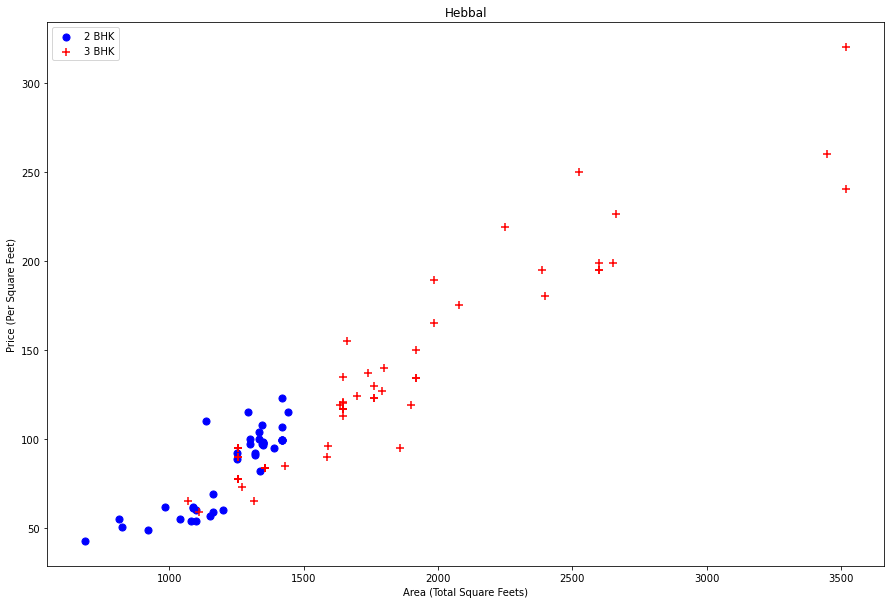

In [128]:
scatter_plot(df6, "Hebbal")

In [135]:
# Remove Outlier BHK

In [141]:
def remove_outliers_bhk(df):
    exclude_index = np.array([])
    for location, df_location in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, df_bhk in df_location.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(df_bhk.price_per_sqft),
                'std' : np.std(df_bhk.price_per_sqft),
                'count' : df_bhk.shape[0]
            }
        
        for bhk, df_bhk in df_location.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_index = np.append(exclude_index, df_bhk[df_bhk.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_index, axis = 'index')

In [142]:
df7 = remove_outliers_bhk(df6)
df7.shape

(7353, 6)

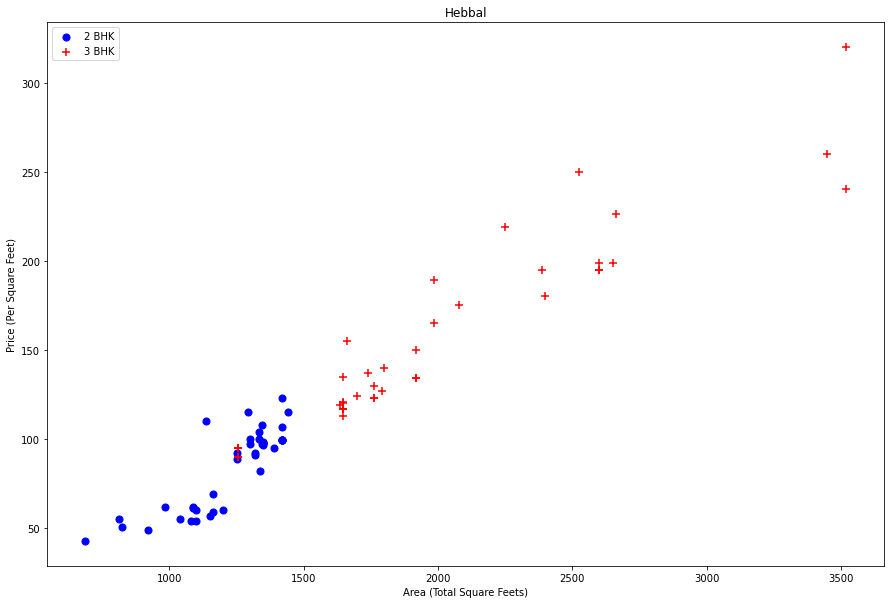

In [143]:
scatter_plot(df7, "Hebbal")

Text(0, 0.5, 'Count')

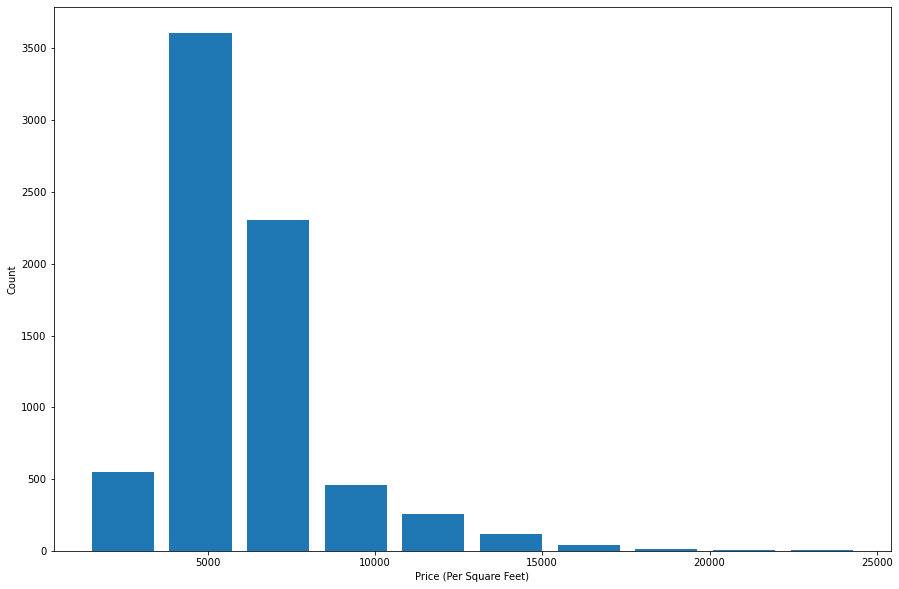

In [144]:
plt.hist(df7.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price (Per Square Feet)")
plt.ylabel("Count")

In [152]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [153]:
df7[df7.bath > 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5306,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8530,other,12000.0,12.0,525.0,10,4375.000000
8619,other,10000.0,16.0,550.0,16,5500.000000
9352,other,6000.0,12.0,150.0,11,2500.000000
9683,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

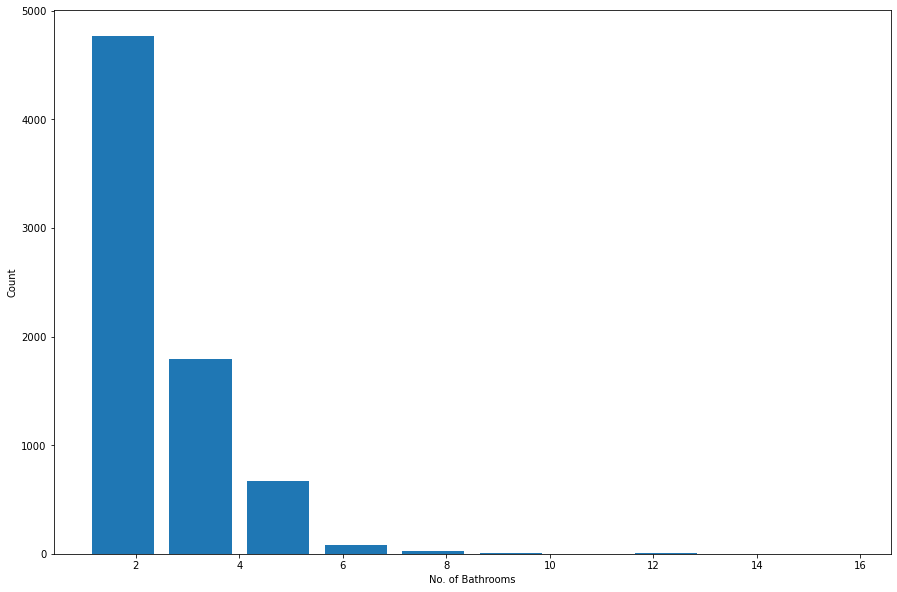

In [154]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")

In [158]:
df7[df7.bath > df7.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8455,other,11338.0,9.0,1000.0,6,8819.897689


In [159]:
df8 = df7[df7.bath < df7.bhk+2]
df8.shape

(7268, 6)

In [160]:
df9 = df8.drop(['price_per_sqft'], axis= 'columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [161]:
# Encoding for Location attribute

In [164]:
fake = pd.get_dummies(df9.location)
fake.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
df10 = pd.concat([df9, fake.drop('other', axis='columns')], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df11 = df10.drop('location', axis='columns')
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
df11.shape

(7268, 245)

In [176]:
df11.dropna(inplace=True)

In [177]:
X = df11.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [179]:
# Training and Testing of model

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
from sklearn.linear_model import LinearRegression
lin_r = LinearRegression()
lin_r.fit(X_train, y_train)
lin_r.score(X_test, y_test)

0.8674530425259364

In [182]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cvs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cvs)

array([0.84449975, 0.8565528 , 0.8692398 , 0.88771646, 0.86978145])

In [183]:
# Selecting best algorithm 

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_algo(X,y):
    algo = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cvs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cvs, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

best_algo(X,y)

,model,best_score,best_params
0,linear_regression,0.865558,{'normalize': False}
1,lasso,0.718042,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.670330,"{'criterion': 'mse', 'splitter': 'best'}"


In [199]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [200]:
def price_prediction(location, sqft, bath, bhk):
    index_location = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if index_location >= 0:
        x[index_location] = 1
        
    return lin_r.predict([x])[0]

In [210]:
price_prediction('1st Phase JP Nagar', 1000, 2, 2)

95.12869764046451

In [216]:
price_prediction('1st Phase JP Nagar', 1000, 3, 3)

97.45576745626478

In [224]:
price_prediction('Indira Nagar', 1000, 2, 2)

179.52681634308578

In [230]:
price_prediction('Indira Nagar', 1000, 3, 3)

181.85388615888607

In [231]:
import pickle
with open('house_price_prediction_system.pickle', 'wb') as f:
    pickle.dump(lin_r, f)

In [232]:
import json
columns = { 'data_columns' : [col.lower() for col in X.columns]}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))